In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression, f_regression

1. Исходные данные

In [30]:
# Фиксация генератора случайных чисел
random_seed = 2022  # dataset_0: 2022
np.random.seed(random_seed)

# Число признаков
N_feat = 5

# Число строк (число измерений)
N_rows = 100

# Точные значения коэффициентов регрессии
z_complex_acc = (0.040 + 0.02j, 0.035 + 0.015j, 0.03 + 0.02j, 0.020 + 0.012j, 0.016 + 0.01j)
# z_complex_acc = (0.040 + 0.0001j, 0.035 + 0.0001j, 0.03 + 0.0001j, 0.020 + 0.0001j, 0.016 + 0.0001j)
# z_complex_acc = (0.040, 0.035, 0.03, 0.020, 0.016)

# Отн. погрешность коэффициентов регрессии
q = 0.

# Начальные значения матрицы A
A_0 = [400 + 150j, 200 + 100j, 450 + 200j, 600 + 250j, 200 + 100j]
# A_0 = [400 + 0.0001j, 200 + 0.0001j, 450 + 0.0001j, 600 + 0.0001j, 200 + 0.0001j]
# A_0 = [400, 200, 450, 600, 200]

# Коэффициенты увеличения значений элементов матрицы A
k_values = [1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows]

# Отн. погрешности значений элементов матрицы A и вектора b
k_A = 0.01
k_b = 0.05

2. Запись z_complex_acc в файл

In [31]:
df_z_complex_acc = pd.DataFrame(z_complex_acc)
file_path = 'C:\Datasets/dataset_z_complex_reg_acc.xlsx'
df_z_complex_acc.to_excel(file_path, index=False, float_format='%.20f')

3. Формирование вектора z_complex, матрицы A и вектора b

In [32]:
# Генерация вектора z_phase
z_complex = z_complex_acc * np.random.uniform(1, 1 + q, N_feat)
z_complex

array([0.04 +0.02j , 0.035+0.015j, 0.03 +0.02j , 0.02 +0.012j,
       0.016+0.01j ])

In [33]:
# Создание пустой матрицы A
A = np.zeros((N_rows, N_feat)).astype(complex)
# Заполнение первой строки матрицы A
A[0] = A_0
# Заполнение остальных строк матрицы A
for i in range(1, N_rows):
    A[i] = A[i-1]
    for j in range(N_feat):
        A[i, j:j+1] *= np.random.uniform(1, 1 + k_values[j])

b = np.sum(A * z_complex, axis=1)

# Генерация названий столбцов
column_names_0 = []

for i in range(1, N_feat + 1):
    column_names_0.append(f"A_{i}")

df_complex_0 = pd.DataFrame(A, columns=column_names_0)
df_complex_0["b"] = b
file_path = 'C:\Datasets/dataset_complex_reg_0.xlsx'
df_complex_0.to_excel(file_path, index=False, float_format='%.20f')
df_complex_0

,A_1,A_2,A_3,A_4,A_5,b
0,400.000000+150.000000j,200.000000+100.000000j,450.000000+200.000000j,600.000000+250.000000j,200.000000+100.000000j,39.200000+51.300000j
1,402.921928+151.095723j,202.692972+101.346486j,454.370301+201.942356j,608.072668+253.363612j,202.163405+101.081702j,39.606169+51.838551j
2,407.946486+152.979932j,205.209105+102.604553j,460.051609+204.467382j,616.801956+257.000815j,203.279482+101.639741j,40.101815+52.483147j
3,410.974495+154.115436j,206.254162+103.127081j,464.326150+206.367178j,625.846089+260.769204j,203.573525+101.786762j,40.458102+52.954767j
4,415.562242+155.835841j,207.159100+103.579550j,466.406392+207.291730j,632.910077+263.712532j,203.630516+101.815258j,40.782592+53.358750j
...,...,...,...,...,...,...
95,813.544949+305.079356j,416.805300+208.402650j,922.461153+409.982735j,1183.940560+493.308567j,434.083904+217.041952j,79.910568+104.655919j
96,819.670740+307.376527j,417.792649+208.896325j,929.962976+413.316878j,1185.061608+493.775670j,439.799087+219.899544j,80.374863+105.278139j
97,820.968624+307.863234j,421.856504+210.928252j,937.342687+416.596750j,1191.313698+496.380707j,444.891074+222.445537j,80.834387+105.920412j
98,828.110129+310.541298j,426.787797+213.393898j,947.095035+420.931127j,1204.042158+501.684233j,446.936050+223.468025j,81.621401+106.951332j


In [34]:
df_0_real = df_complex_0.applymap(lambda x: x.real)
df_0_imag = df_complex_0.applymap(lambda x: x.imag)
df_0_modul = df_complex_0.applymap(lambda x: abs(x))


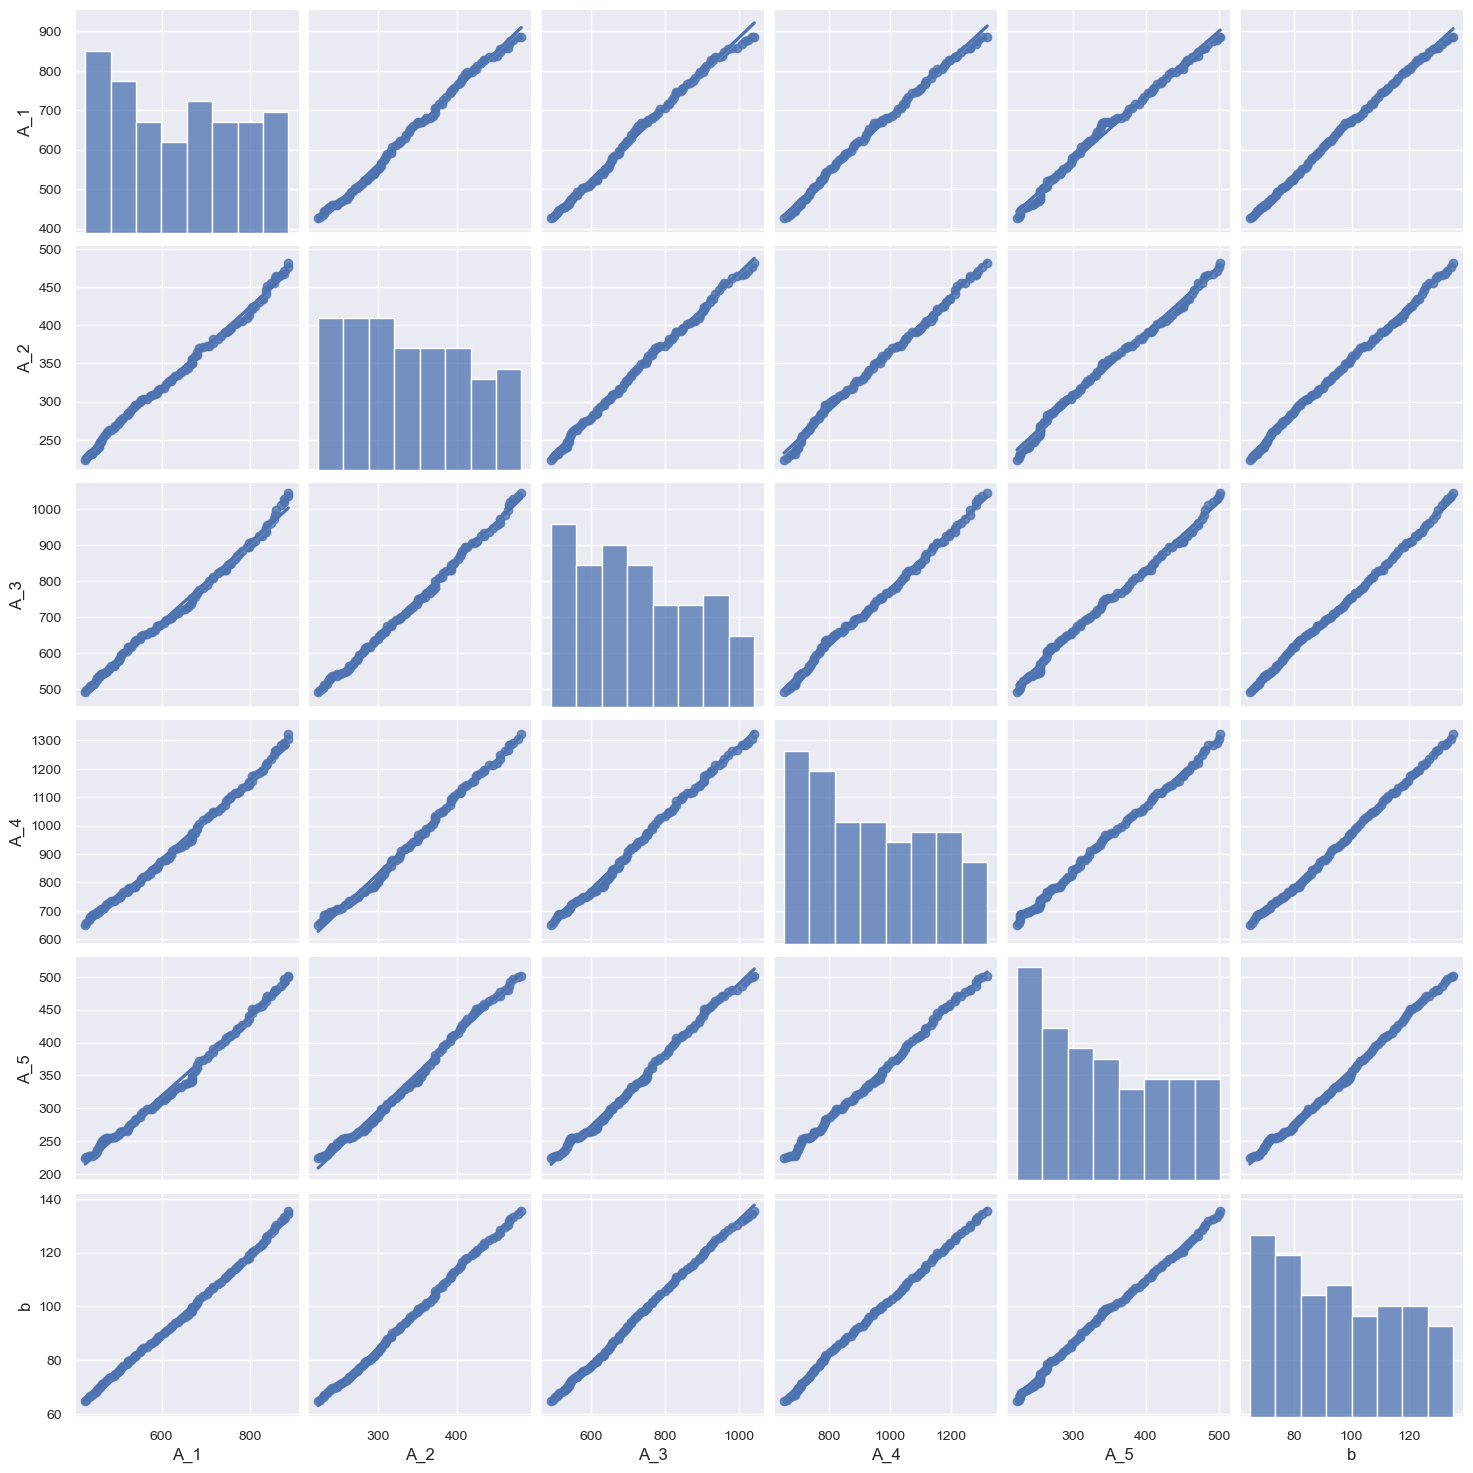

In [35]:
sns.pairplot(df_0_modul, kind="reg")
plt.show()

4. Генерация матрицы A_h и вектора b_d, заданных с погрешностями k_A и k_b

In [36]:
# Фиксация генератора случайных чисел для генерации матрицы A_h и вектора b_d
random_seed = 1986  # dataset_complex_reg_1: 1986  dataset_complex_reg_2: 2017
np.random.seed(random_seed)

In [37]:
random_values_1 = np.random.uniform(1 - k_A, 1 + k_A, size=A.shape)
random_values_2 = np.random.uniform(1 - k_b, 1 + k_b, size=b.shape)
A_h = A * random_values_1
b_d = b * random_values_2
# Генерация названий столбцов
column_names = []

for i in range(1, N_feat + 1):
    column_names.append(f"A_h_{i}")

df_complex = pd.DataFrame(A_h, columns=column_names)
df_complex["b_d"] = b_d
file_path = 'C:\Datasets/dataset_complex_reg_1.xlsx'
df_complex.to_excel(file_path, index=False, float_format='%.20f')
df_complex

,A_h_1,A_h_2,A_h_3,A_h_4,A_h_5,b_d
0,400.551003+150.206626j,198.309353+99.154677j,450.976315+200.433918j,604.769973+251.987489j,200.179627+100.089814j,39.491479+51.681451j
1,404.555551+151.708332j,202.231387+101.115694j,455.748484+202.554882j,610.383972+254.326655j,203.047404+101.523702j,41.062879+53.745167j
2,409.498203+153.561826j,206.468286+103.234143j,458.061881+203.583058j,619.980687+258.325286j,202.497154+101.248577j,38.755485+50.721141j
3,410.464119+153.924045j,206.471537+103.235769j,463.702654+206.090068j,626.817637+261.174015j,205.170384+102.585192j,42.162467+55.185575j
4,413.355916+155.008468j,207.056153+103.528077j,469.752997+208.779110j,630.087949+262.536645j,203.485288+101.742644j,41.762503+54.640837j
...,...,...,...,...,...,...
95,813.187665+304.945374j,413.080081+206.540040j,914.629324+406.501922j,1193.708233+497.378430j,434.451853+217.225927j,79.883679+104.620703j
96,821.994064+308.247774j,414.487860+207.243930j,930.778947+413.679532j,1186.914628+494.547762j,439.240190+219.620095j,77.726522+101.809238j
97,822.664343+308.499129j,420.805697+210.402848j,943.381340+419.280596j,1189.353666+495.564028j,445.422660+222.711330j,77.078618+100.999084j
98,832.029027+312.010885j,427.866796+213.933398j,951.331564+422.814028j,1214.309393+505.962247j,443.085808+221.542904j,80.871598+105.968838j


In [38]:
df_real = df_complex.applymap(lambda x: x.real)
df_imag = df_complex.applymap(lambda x: x.imag)
df_modul = df_complex.applymap(lambda x: abs(x))


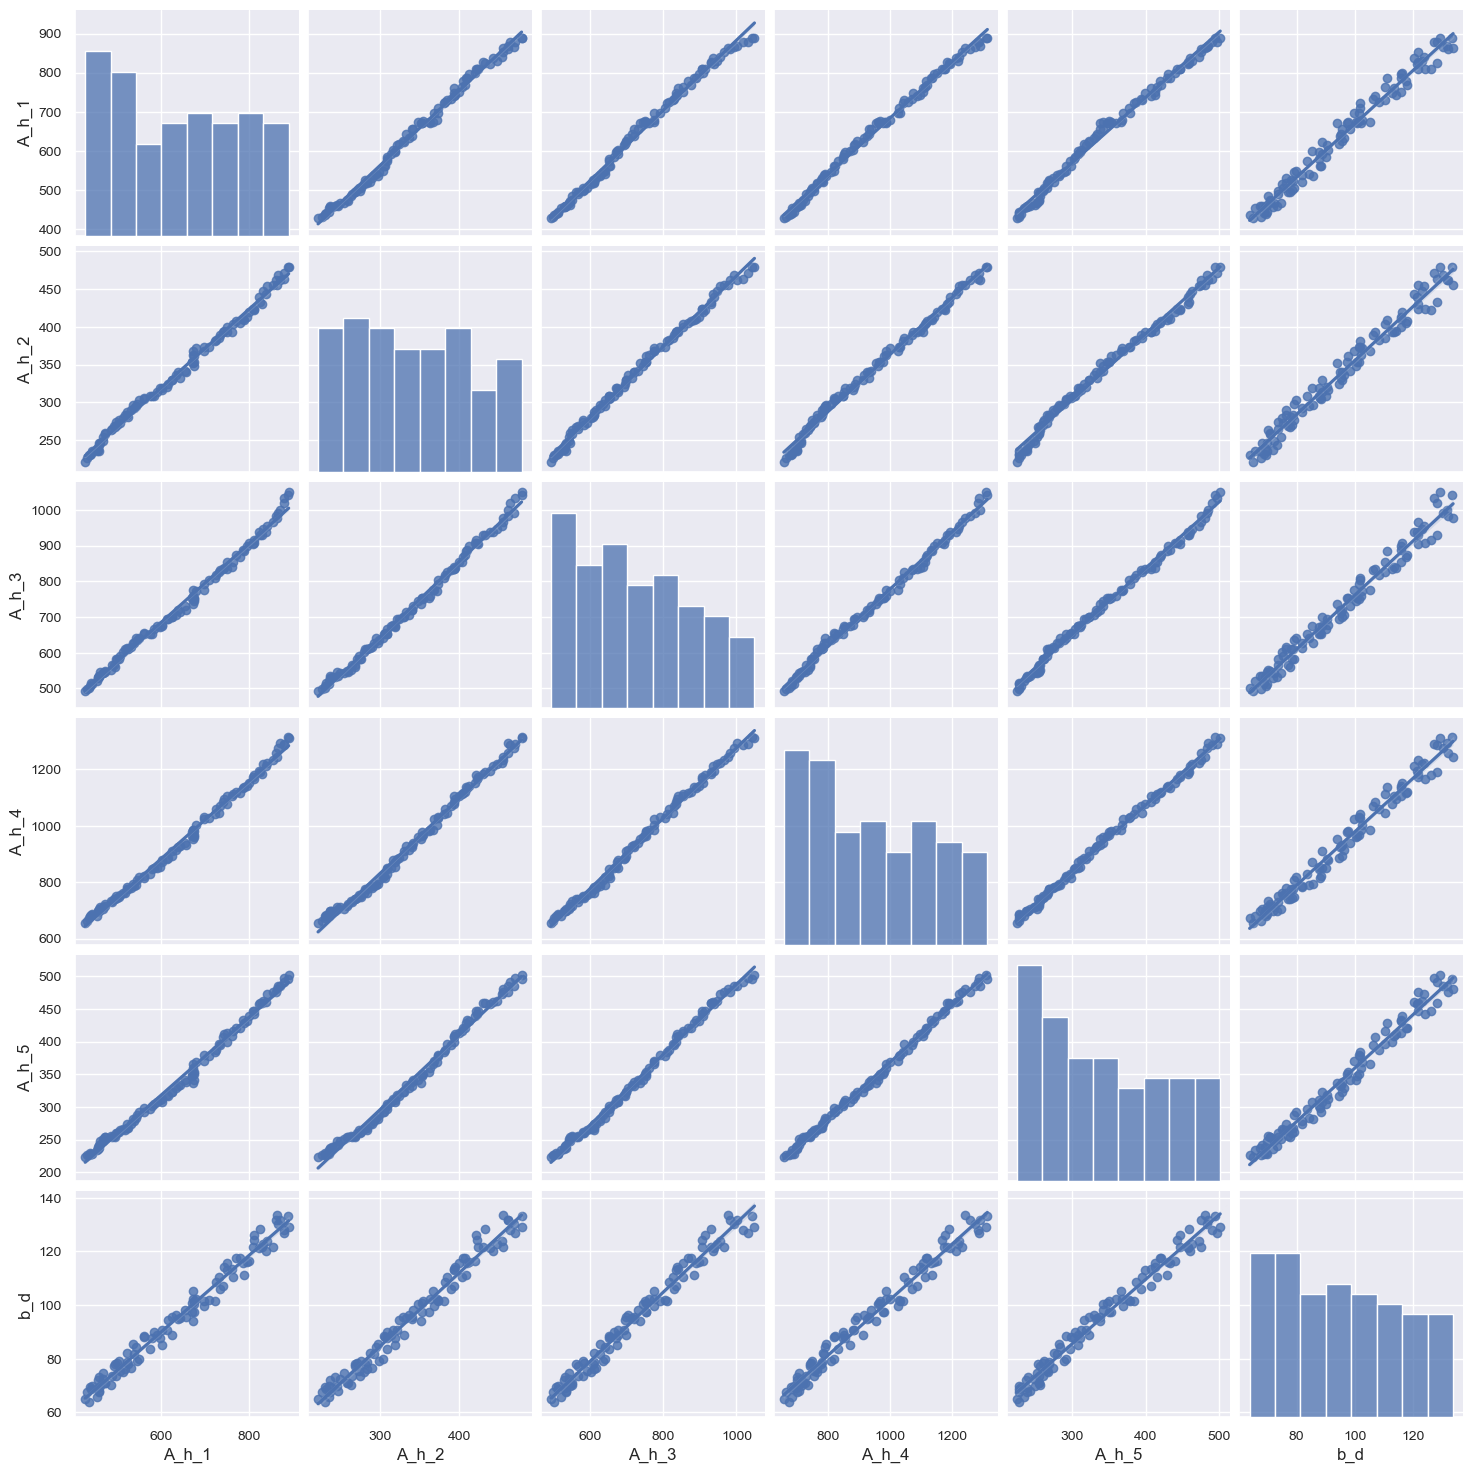

In [39]:
sns.pairplot(df_modul, kind="reg")
plt.show()

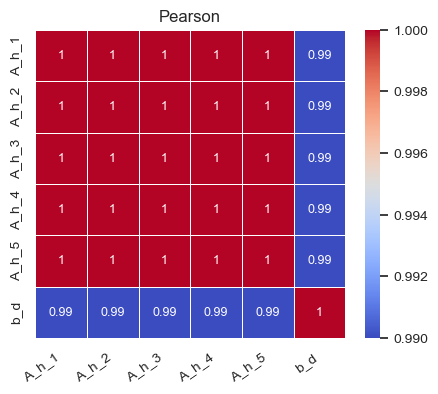

In [40]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_modul.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5. Анализ значимости признаков

In [41]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df_modul, features = df_complex.columns)

,VIF,Tolerance
A_h_1,294.309310,0.003398
A_h_2,269.034491,0.003717
A_h_3,382.007941,0.002618
A_h_4,518.648182,0.001928
A_h_5,390.616627,0.002560
b_d,53.654010,0.018638


MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [42]:
X = df_modul.copy()
y = X.pop('b_d')
mi_full = mutual_info_regression(X, y, random_state=2023)
f_full = f_regression(X, y)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X.corrwith(y), 'f':f_full[0], 'p':f_full[1]}, index=X.columns)
f_p_full.round(3)

,MI,corr,f,p
A_h_1,1.777,0.990,4785.947,0.0
A_h_2,1.770,0.988,4048.953,0.0
A_h_3,1.788,0.989,4225.187,0.0
A_h_4,1.767,0.989,4299.575,0.0
A_h_5,1.771,0.989,4457.581,0.0
